Route 1: (0, 1, 2, 3), Cost: 222.06
Route 2: (0, 1, 3, 2), Cost: 237.78
Route 3: (0, 2, 1, 3), Cost: 178.09
Route 4: (0, 2, 3, 1), Cost: 201.36
Route 5: (0, 3, 1, 2), Cost: 186.05
Route 6: (0, 3, 2, 1), Cost: 193.59
Route 7: (1, 0, 2, 3), Cost: 235.47
Route 8: (1, 0, 3, 2), Cost: 243.43
Route 9: (1, 2, 0, 3), Cost: 183.73
Route 10: (1, 2, 3, 0), Cost: 193.59
Route 11: (1, 3, 0, 2), Cost: 199.46
Route 12: (1, 3, 2, 0), Cost: 201.36
Route 13: (2, 0, 1, 3), Cost: 227.93
Route 14: (2, 0, 3, 1), Cost: 199.46
Route 15: (2, 1, 0, 3), Cost: 220.16
Route 16: (2, 1, 3, 0), Cost: 186.05
Route 17: (2, 3, 0, 1), Cost: 243.43
Route 18: (2, 3, 1, 0), Cost: 237.78
Route 19: (3, 0, 1, 2), Cost: 220.16
Route 20: (3, 0, 2, 1), Cost: 183.73
Route 21: (3, 1, 0, 2), Cost: 227.93
Route 22: (3, 1, 2, 0), Cost: 178.09
Route 23: (3, 2, 0, 1), Cost: 235.47
Route 24: (3, 2, 1, 0), Cost: 222.06
Enter the number of the start city (1 to 4): 2
Enter the number of the goal city (1 to 4): 3

City Coordinates:
City 1: (

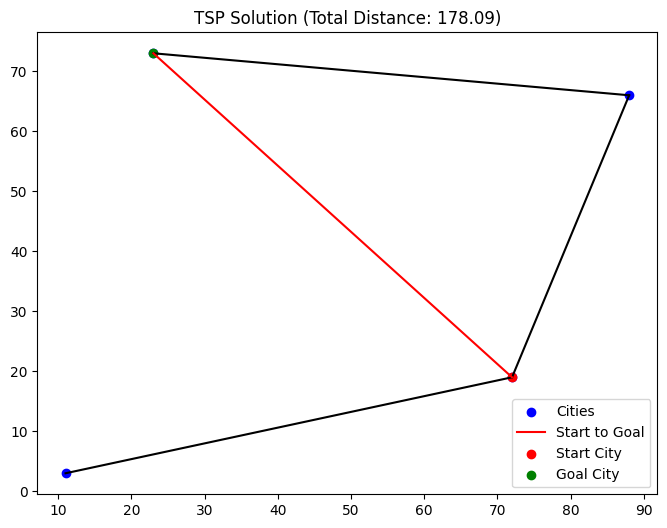

In [ ]:
import random
import math
import itertools
import matplotlib.pyplot as plt

# Generate random cities with coordinates
def generate_random_cities(num_cities, max_coordinate):
    cities = []
    for _ in range(num_cities):
        x = random.randint(0, max_coordinate)
        y = random.randint(0, max_coordinate)
        cities.append((x, y))
    return cities

# Calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Generate initial path from start city
def generate_initial_path(start_city, goal_city, num_cities):
    path = list(range(num_cities))
    path.remove(start_city)
    path.remove(goal_city)
    path = [start_city] + random.sample(path, num_cities - 2) + [goal_city]
    return path

# Hill climbing algorithm
def hill_climbing(cities, start_city, goal_city, max_iterations):
    current_path = generate_initial_path(start_city, goal_city, len(cities))
    current_distance = calculate_total_distance(current_path, cities)

    for _ in range(max_iterations):
        neighbors = []
        for i in range(len(current_path)):
            for j in range(i + 1, len(current_path)):
                neighbor_path = current_path[:i] + list(reversed(current_path[i:j])) + current_path[j:]
                neighbors.append(neighbor_path)

        best_neighbor = min(neighbors, key=lambda path: calculate_total_distance(path, cities))
        best_distance = calculate_total_distance(best_neighbor, cities)

        if best_distance < current_distance:
            current_path = best_neighbor
            current_distance = best_distance
        else:
            # If no better neighbor is found, terminate
            break

    return current_path, current_distance

# Get all possible routes and their costs
def get_all_possible_routes_and_costs(cities):
    all_routes = list(itertools.permutations(range(len(cities))))
    route_costs = [calculate_total_distance(route, cities) for route in all_routes]
    return all_routes, route_costs

# Plot the cities, the optimal path, and start/goal cities
def plot_cities_and_path(cities, path, start_city, goal_city):
    x, y = zip(*cities)
    plt.figure(figsize=(8, 6))

    # Plot cities in blue
    plt.scatter(x, y, marker='o', color='b', label='Cities')

    # Plot the optimal path in black
    for i in range(len(path) - 1):
        plt.plot([cities[path[i]][0], cities[path[i + 1]][0]],
                 [cities[path[i]][1], cities[path[i + 1]][1]], 'k-')

    # Plot a line connecting start and goal cities in red
    plt.plot([cities[start_city][0], cities[goal_city][0]],
             [cities[start_city][1], cities[goal_city][1]], 'r-', label='Start to Goal')

    # Mark start city as red
    plt.scatter(cities[start_city][0], cities[start_city][1], marker='o', color='r', label='Start City')

    # Mark goal city as green
    plt.scatter(cities[goal_city][0], cities[goal_city][1], marker='o', color='g', label='Goal City')

    plt.title(f'TSP Solution (Total Distance: {calculate_total_distance(path, cities):.2f})')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    num_cities = 4  # Change the number of cities as needed
    max_coordinate = 100  # Maximum x and y coordinates
    max_iterations = 10000  # Maximum number of iterations

    cities = generate_random_cities(num_cities, max_coordinate)

    # Print all possible routes and their costs
    all_routes, route_costs = get_all_possible_routes_and_costs(cities)
    for i, route in enumerate(all_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    # Allow the user to enter the start and goal city numbers
    start_city = int(input(f"Enter the number of the start city (1 to {num_cities}): "))
    goal_city = int(input(f"Enter the number of the goal city (1 to {num_cities}): "))

    optimal_path, optimal_distance = hill_climbing(cities, start_city, goal_city, max_iterations)

    # Print city coordinates
    print("\nCity Coordinates:")
    for i, city in enumerate(cities):
        print(f"City {i + 1}: ({city[0]}, {city[1]})")

    # Print the optimal path and its total distance
    print("\nOptimal Path:")
    print(optimal_path)
    print("Total Distance:", optimal_distance)

    # Plot the cities, the optimal path, and the start/goal cities
    plot_cities_and_path(cities, optimal_path, start_city, goal_city)


Route 1: (0, 1, 2, 3, 4), Cost: 306.39
Route 2: (0, 1, 2, 4, 3), Cost: 320.70
Route 3: (0, 1, 3, 2, 4), Cost: 272.18
Route 4: (0, 1, 3, 4, 2), Cost: 257.76
Route 5: (0, 1, 4, 2, 3), Cost: 338.44
Route 6: (0, 1, 4, 3, 2), Cost: 309.70
Route 7: (0, 2, 1, 3, 4), Cost: 281.82
Route 8: (0, 2, 1, 4, 3), Cost: 348.08
Route 9: (0, 2, 3, 1, 4), Cost: 299.56
Route 10: (0, 2, 3, 4, 1), Cost: 349.21
Route 11: (0, 2, 4, 1, 3), Cost: 313.87
Route 12: (0, 2, 4, 3, 1), Cost: 297.26
Route 13: (0, 3, 1, 2, 4), Cost: 253.80
Route 14: (0, 3, 1, 4, 2), Cost: 257.12
Route 15: (0, 3, 2, 1, 4), Cost: 305.75
Route 16: (0, 3, 2, 4, 1), Cost: 321.20
Route 17: (0, 3, 4, 1, 2), Cost: 291.33
Route 18: (0, 3, 4, 2, 1), Cost: 303.46
Route 19: (0, 4, 1, 2, 3), Cost: 279.91
Route 20: (0, 4, 1, 3, 2), Cost: 216.97
Route 21: (0, 4, 2, 1, 3), Cost: 227.96
Route 22: (0, 4, 2, 3, 1), Cost: 229.09
Route 23: (0, 4, 3, 1, 2), Cost: 199.23
Route 24: (0, 4, 3, 2, 1), Cost: 263.31
Route 25: (1, 0, 2, 3, 4), Cost: 342.80
Route 26:

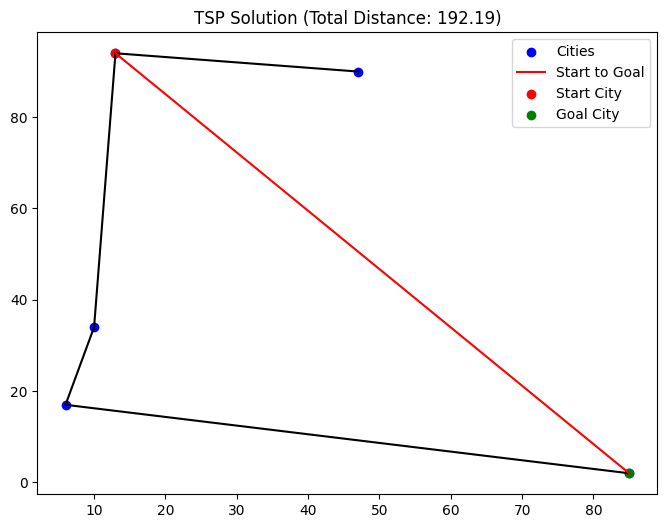

In [ ]:
import random
import math
import itertools
import matplotlib.pyplot as plt

# Generate random cities with coordinates
def generate_random_cities(num_cities, max_coordinate):
    cities = []
    for _ in range(num_cities):
        x = random.randint(0, max_coordinate)
        y = random.randint(0, max_coordinate)
        cities.append((x, y))
    return cities

# Calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Generate initial path from start city
def generate_initial_path(start_city, goal_city, num_cities):
    path = list(range(num_cities))
    path.remove(start_city)
    path.remove(goal_city)
    path = [start_city] + random.sample(path, num_cities - 2) + [goal_city]
    return path

# Hill climbing algorithm
def hill_climbing(cities, start_city, goal_city, max_iterations):
    current_path = generate_initial_path(start_city, goal_city, len(cities))
    current_distance = calculate_total_distance(current_path, cities)

    for _ in range(max_iterations):
        neighbors = []
        for i in range(len(current_path)):
            for j in range(i + 1, len(current_path)):
                neighbor_path = current_path[:i] + list(reversed(current_path[i:j])) + current_path[j:]
                neighbors.append(neighbor_path)

        best_neighbor = min(neighbors, key=lambda path: calculate_total_distance(path, cities))
        best_distance = calculate_total_distance(best_neighbor, cities)

        if best_distance < current_distance:
            current_path = best_neighbor
            current_distance = best_distance
        else:
            # If no better neighbor is found, terminate
            break

    return current_path, current_distance

# Get all possible routes and their costs
def get_all_possible_routes_and_costs(cities):
    all_routes = list(itertools.permutations(range(len(cities))))
    route_costs = [calculate_total_distance(route, cities) for route in all_routes]
    return all_routes, route_costs

# Plot the cities, the optimal path, and start/goal cities
def plot_cities_and_path(cities, path, start_city, goal_city):
    x, y = zip(*cities)
    plt.figure(figsize=(8, 6))

    # Plot cities in blue
    plt.scatter(x, y, marker='o', color='b', label='Cities')

    # Plot the optimal path in black
    for i in range(len(path) - 1):
        plt.plot([cities[path[i]][0], cities[path[i + 1]][0]],
                 [cities[path[i]][1], cities[path[i + 1]][1]], 'k-')

    # Plot a line connecting start and goal cities in red
    plt.plot([cities[start_city][0], cities[goal_city][0]],
             [cities[start_city][1], cities[goal_city][1]], 'r-', label='Start to Goal')

    # Mark start city as red
    plt.scatter(cities[start_city][0], cities[start_city][1], marker='o', color='r', label='Start City')

    # Mark goal city as green
    plt.scatter(cities[goal_city][0], cities[goal_city][1], marker='o', color='g', label='Goal City')

    plt.title(f'TSP Solution (Total Distance: {calculate_total_distance(path, cities):.2f})')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    num_cities = 5  # Change the number of cities as needed
    max_coordinate = 100  # Maximum x and y coordinates
    max_iterations = 10000  # Maximum number of iterations

    cities = generate_random_cities(num_cities, max_coordinate)

    # Print all possible routes and their costs
    all_routes, route_costs = get_all_possible_routes_and_costs(cities)
    for i, route in enumerate(all_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    # Allow the user to enter the start and goal city numbers
    start_city = int(input(f"Enter the number of the start city (1 to {num_cities}): "))
    goal_city = int(input(f"Enter the number of the goal city (1 to {num_cities}): "))

    optimal_path, optimal_distance = hill_climbing(cities, start_city, goal_city, max_iterations)

    # Print city coordinates
    print("\nCity Coordinates:")
    for i, city in enumerate(cities):
        print(f"City {i + 1}: ({city[0]}, {city[1]})")

    # Print the optimal path and its total distance
    print("\nOptimal Path:")
    print(optimal_path)
    print("Total Distance:", optimal_distance)

    # Plot the cities, the optimal path, and the start/goal cities
    plot_cities_and_path(cities, optimal_path, start_city, goal_city)


Enter the number of the start city (1 to 5): 0
Enter the number of the goal city (1 to 5): 2

City Coordinates:
City 1: (93, 15)
City 2: (98, 6)
City 3: (51, 67)
City 4: (46, 38)
City 5: (100, 68)

Optimal Path:
[0, 2]
Total Distance: 66.84309986827361


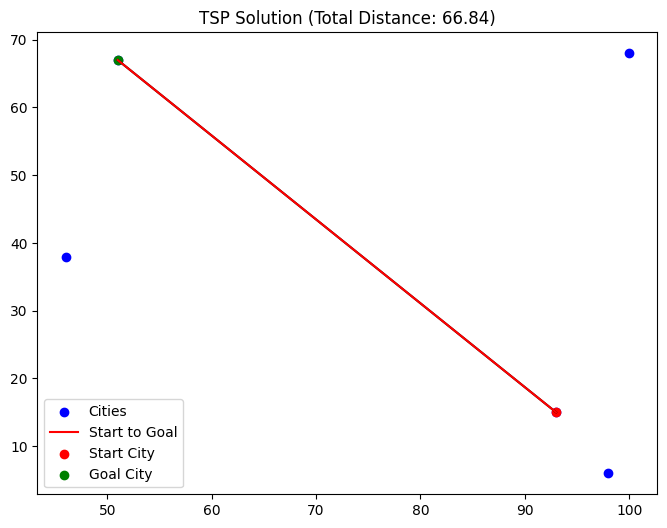

In [ ]:
import random
import math
import itertools
import matplotlib.pyplot as plt

# Generate random cities with coordinates
def generate_random_cities(num_cities, max_coordinate):
    cities = []
    for _ in range(num_cities):
        x = random.randint(0, max_coordinate)
        y = random.randint(0, max_coordinate)
        cities.append((x, y))
    return cities

# Calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Generate initial path from start city to goal city
def generate_initial_path(start_city, goal_city):
    return [start_city, goal_city]

# Hill climbing algorithm
def hill_climbing(cities, start_city, goal_city, max_iterations):
    current_path = generate_initial_path(start_city, goal_city)
    current_distance = calculate_total_distance(current_path, cities)

    for _ in range(max_iterations):
        neighbor_path = list(reversed(current_path))
        neighbor_distance = calculate_total_distance(neighbor_path, cities)

        if neighbor_distance < current_distance:
            current_path = neighbor_path
            current_distance = neighbor_distance
        else:
            # If the reversed path is not better, terminate
            break

    return current_path, current_distance

# Plot the cities, the optimal path, and start/goal cities
def plot_cities_and_path(cities, path, start_city, goal_city):
    x, y = zip(*cities)
    plt.figure(figsize=(8, 6))

    # Plot cities in blue
    plt.scatter(x, y, marker='o', color='b', label='Cities')

    # Plot the optimal path in black
    for i in range(len(path) - 1):
        plt.plot([cities[path[i]][0], cities[path[i + 1]][0]],
                 [cities[path[i]][1], cities[path[i + 1]][1]], 'k-')

    # Plot a line connecting start and goal cities in red
    plt.plot([cities[start_city][0], cities[goal_city][0]],
             [cities[start_city][1], cities[goal_city][1]], 'r-', label='Start to Goal')

    # Mark start city as red
    plt.scatter(cities[start_city][0], cities[start_city][1], marker='o', color='r', label='Start City')

    # Mark goal city as green
    plt.scatter(cities[goal_city][0], cities[goal_city][1], marker='o', color='g', label='Goal City')

    plt.title(f'TSP Solution (Total Distance: {calculate_total_distance(path, cities):.2f})')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    num_cities = 5  # Change the number of cities as needed
    max_coordinate = 100  # Maximum x and y coordinates
    max_iterations = 10000  # Maximum number of iterations

    cities = generate_random_cities(num_cities, max_coordinate)

    # Allow the user to enter the start and goal city numbers
    start_city = int(input(f"Enter the number of the start city (1 to {num_cities}): "))
    goal_city = int(input(f"Enter the number of the goal city (1 to {num_cities}): ") )2


    optimal_path, optimal_distance = hill_climbing(cities, start_city, goal_city, max_iterations)

    # Print city coordinates
    print("\nCity Coordinates:")
    for i, city in enumerate(cities):
        print(f"City {i + 1}: ({city[0]}, {city[1]})")

    # Print the optimal path and its total distance
    print("\nOptimal Path:")
    print(optimal_path)
    print("Total Distance:", optimal_distance)

    # Plot the cities, the optimal path, and the start/goal cities
    plot_cities_and_path(cities, optimal_path, start_city, goal_city)


Enter the number of the start city (1 to 5): 0
Enter the number of the goal city (1 to 5): 2
Route 1: [0, 1, 3, 4, 2], Cost: 176.36
Route 2: [0, 1, 4, 3, 2], Cost: 178.82
Route 3: [0, 3, 1, 4, 2], Cost: 187.44
Route 4: [0, 3, 4, 1, 2], Cost: 191.38
Route 5: [0, 4, 1, 3, 2], Cost: 134.89
Route 6: [0, 4, 3, 1, 2], Cost: 136.38

City Coordinates:
City 0: (36, 89)
City 1: (45, 42)
City 2: (27, 47)
City 3: (10, 21)
City 4: (20, 77)

Optimal Path:
[0, 2]
Total Distance: 42.95346318982906


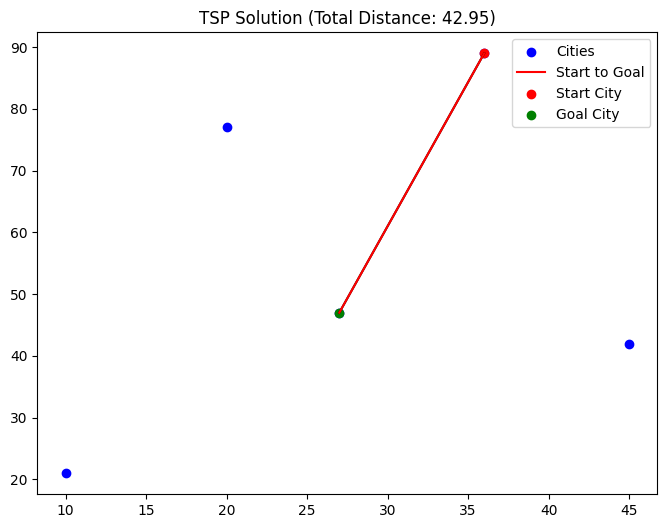

In [ ]:
import random
import math
import itertools
import matplotlib.pyplot as plt

# Generate random cities with coordinates
def generate_random_cities(num_cities, max_coordinate):
    cities = []
    for _ in range(num_cities):
        x = random.randint(0, max_coordinate)
        y = random.randint(0, max_coordinate)
        cities.append((x, y))
    return cities

# Calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Generate initial path from start city to goal city
def generate_initial_path(start_city, goal_city):
    return [start_city, goal_city]

# Generate all possible routes with the given start and goal city
def generate_possible_routes(start_city, goal_city, num_cities):
    remaining_cities = [i for i in range(num_cities) if i != start_city and i != goal_city]
    all_routes = list(itertools.permutations(remaining_cities))
    possible_routes = [[start_city] + list(route) + [goal_city] for route in all_routes]
    return possible_routes

# Calculate the cost of all possible routes
def calculate_possible_route_costs(cities, possible_routes):
    route_costs = [calculate_total_distance(route, cities) for route in possible_routes]
    return route_costs

# Hill climbing algorithm
def hill_climbing(cities, start_city, goal_city, max_iterations):
    current_path = generate_initial_path(start_city, goal_city)
    current_distance = calculate_total_distance(current_path, cities)

    for _ in range(max_iterations):
        neighbor_path = list(reversed(current_path))
        neighbor_distance = calculate_total_distance(neighbor_path, cities)

        if neighbor_distance < current_distance:
            current_path = neighbor_path
            current_distance = neighbor_distance
        else:
            # If the reversed path is not better, terminate
            break

    return current_path, current_distance

# Plot the cities, the optimal path, and start/goal cities
def plot_cities_and_path(cities, path, start_city, goal_city):
    x, y = zip(*cities)
    plt.figure(figsize=(8, 6))

    # Plot cities in blue
    plt.scatter(x, y, marker='o', color='b', label='Cities')

    # Plot the optimal path in black
    for i in range(len(path) - 1):
        plt.plot([cities[path[i]][0], cities[path[i + 1]][0]],
                 [cities[path[i]][1], cities[path[i + 1]][1]], 'k-')

    # Plot a line connecting start and goal cities in red
    plt.plot([cities[start_city][0], cities[goal_city][0]],
             [cities[start_city][1], cities[goal_city][1]], 'r-', label='Start to Goal')

    # Mark start city as red
    plt.scatter(cities[start_city][0], cities[start_city][1], marker='o', color='r', label='Start City')

    # Mark goal city as green
    plt.scatter(cities[goal_city][0], cities[goal_city][1], marker='o', color='g', label='Goal City')

    plt.title(f'TSP Solution (Total Distance: {calculate_total_distance(path, cities):.2f})')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    num_cities = 5  # Change the number of cities as needed
    max_coordinate = 100  # Maximum x and y coordinates
    max_iterations = 10000  # Maximum number of iterations

    cities = generate_random_cities(num_cities, max_coordinate)

    # Allow the user to enter the start and goal city numbers
    start_city = int(input(f"Enter the number of the start city (1 to {num_cities}): ") )
    goal_city = int(input(f"Enter the number of the goal city (1 to {num_cities}): "))

    possible_routes = generate_possible_routes(start_city, goal_city, num_cities)
    route_costs = calculate_possible_route_costs(cities, possible_routes)

    # Print all possible routes and their costs
    for i, route in enumerate(possible_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    optimal_path, optimal_distance = hill_climbing(cities, start_city, goal_city, max_iterations)

    # Print city coordinates
    print("\nCity Coordinates:")
    for i, city in enumerate(cities):
        print(f"City {i }: ({city[0]}, {city[1]})")

    # Print the optimal path and its total distance
    print("\nOptimal Path:")
    print(optimal_path)
    print("Total Distance:", optimal_distance)

    # Plot the cities, the optimal path, and the start/goal cities
    plot_cities_and_path(cities, optimal_path, start_city, goal_city)


In [ ]:
import random
import math
import itertools
import matplotlib.pyplot as plt

# Generate random cities with coordinates
def generate_random_cities(num_cities, max_coordinate):
    cities = []
    for _ in range(num_cities):
        x = random.randint(0, max_coordinate)
        y = random.randint(0, max_coordinate)
        cities.append((x, y))
    return cities

# Calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Generate initial path from start city to goal city
def generate_initial_path(start_city, goal_city):
    return [start_city, goal_city]

# Generate all possible routes with the given start and goal city
def generate_possible_routes(start_city, goal_city, num_cities):
    remaining_cities = [i for i in range(num_cities) if i != start_city and i != goal_city]
    all_routes = list(itertools.permutations(remaining_cities))
    possible_routes = [[start_city] + list(route) + [goal_city] for route in all_routes]
    return possible_routes

# Calculate the cost of all possible routes
def calculate_possible_route_costs(cities, possible_routes):
    route_costs = [calculate_total_distance(route, cities) for route in possible_routes]
    return route_costs

# Hill climbing algorithm
def hill_climbing(cities, start_city, goal_city, max_iterations):
    current_path = generate_initial_path(start_city, goal_city)
    current_distance = calculate_total_distance(current_path, cities)

    for _ in range(max_iterations):
        neighbor_path = list(reversed(current_path))
        neighbor_distance = calculate_total_distance(neighbor_path, cities)

        if neighbor_distance < current_distance:
            current_path = neighbor_path
            current_distance = neighbor_distance
        else:
            # If the reversed path is not better, terminate
            break

    return current_path, current_distance

# Plot the cities, the optimal path, and start/goal cities
def plot_cities_and_path(cities, path, start_city, goal_city):
    x, y = zip(*cities)
    plt.figure(figsize=(8, 6))

    # Plot cities in blue
    plt.scatter(x, y, marker='o', color='b', label='Cities')

    # Plot the optimal path in black
    for i in range(len(path) - 1):
        plt.plot([cities[path[i]][0], cities[path[i + 1]][0]],
                 [cities[path[i]][1], cities[path[i + 1]][1]], 'k-')

    # Plot a line connecting start and goal cities in red
    plt.plot([cities[start_city][0], cities[goal_city][0]],
             [cities[start_city][1], cities[goal_city][1]], 'r-', label='Start to Goal')

    # Mark start city as red
    plt.scatter(cities[start_city][0], cities[start_city][1], marker='o', color='r', label='Start City')

    # Mark goal city as green
    plt.scatter(cities[goal_city][0], cities[goal_city][1], marker='o', color='g', label='Goal City')

    plt.title(f'TSP Solution (Total Distance: {calculate_total_distance(path, cities):.2f})')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    num_cities = 5  # Change the number of cities as needed
    max_coordinate = 100  # Maximum x and y coordinates
    max_iterations = 10000  # Maximum number of iterations

    cities = generate_random_cities(num_cities, max_coordinate)

    # Allow the user to enter the start and goal city numbers
    start_city = int(input(f"Enter the number of the start city (1 to {num_cities}): "))
    goal_city = int(input(f"Enter the number of the goal city (1 to {num_cities}): ") )

    possible_routes = generate_possible_routes(start_city, goal_city, num_cities)
    route_costs = calculate_possible_route_costs(cities, possible_routes)

    # Print all possible routes and their costs
    for i, route in enumerate(possible_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    optimal_path, optimal_distance = hill_climbing(cities, start_city, goal_city, max_iterations)

    # Print city coordinates
    print("\nCity Coordinates:")
    for i, city in enumerate(cities):
        print(f"City {i }: ({city[0]}, {city[1]})")

    # Find the optimal path with the minimum cost
    min_cost_index = route_costs.index(min(route_costs))
    optimal_path = possible_routes[min_cost_index]
    optimal_distance = route_costs[min_cost_index]

    # Print the optimal path and its total distance
    print("\nOptimal Path:")
    print(optimal_path)
    print("Total Distance:", optimal_distance)

    # Plot the cities, the optimal path, and the start/goal cities
    plot_cities_and_path(cities, optimal_path, start_city, goal_city)


Enter the number of the start city (1 to 5): 3
Enter the number of the goal city (1 to 5): 5


IndexError: ignored

In [ ]:
import random
import math
import itertools
import matplotlib.pyplot as plt
import networkx as nx

# Generate random cities with coordinates
def generate_random_cities(num_cities, max_coordinate):
    cities = []
    for _ in range(num_cities):
        x = random.randint(0, max_coordinate)
        y = random.randint(0, max_coordinate)
        cities.append((x, y))
    return cities

# Calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Generate initial random path
def generate_initial_path(num_cities):
    path = list(range(num_cities))
    random.shuffle(path)
    return path

# Hill climbing algorithm
def hill_climbing(cities, max_iterations):
    current_path = generate_initial_path(len(cities))
    current_distance = calculate_total_distance(current_path, cities)

    for _ in range(max_iterations):
        neighbors = []
        for i in range(len(current_path)):
            for j in range(i + 1, len(current_path)):
                neighbor_path = current_path[:i] + list(reversed(current_path[i:j])) + current_path[j:]
                neighbors.append(neighbor_path)

        best_neighbor = min(neighbors, key=lambda path: calculate_total_distance(path, cities))
        best_distance = calculate_total_distance(best_neighbor, cities)

        if best_distance < current_distance:
            current_path = best_neighbor
            current_distance = best_distance
        else:
            # If no better neighbor is found, terminate
            break

    return current_path, current_distance

# Get all possible routes and their costs
def get_all_possible_routes_and_costs(cities):
    all_routes = list(itertools.permutations(range(len(cities))))
    route_costs = [calculate_total_distance(route, cities) for route in all_routes]
    return all_routes, route_costs

# Plot the cities and the optimal path
def plot_cities_and_path(cities, path):
    x, y = zip(*cities)
    G = nx.Graph()
    for i in range(len(cities)):
        G.add_node(i, pos=cities[i])
    pos = nx.get_node_attributes(G, 'pos')
    for i in range(len(path) - 1):
        G.add_edge(path[i], path[i + 1], weight=calculate_total_distance(path, cities))
    G.add_edge(path[-1], path[0], weight=calculate_total_distance(path, cities))
    edge_labels = {(i, j): f"{calculate_total_distance([i, j], cities):.2f}" for i, j in G.edges}
    labels = {i: f"{i + 1}" for i in G.nodes}
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=300, node_color='b', labels=labels, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(f'TSP Solution (Total Distance: {calculate_total_distance(path, cities):.2f})')
    plt.show()

# Generate possible routes from start to goal city
def generate_possible_routes(start, goal, num_cities):
    routes = []
    for i in range(num_cities):
        if i == start:
            continue
        for j in range(num_cities):
            if j == goal:
                continue
            if i == j:
                continue
            route = [start]
            if i != start:
                route.append(i)
            route.append(goal)
            if j != goal:
                route.append(j)
            routes.append(route)
    return routes

# Calculate the cost of possible routes
def calculate_possible_route_costs(cities, routes):
    route_costs = [calculate_total_distance(route, cities) for route in routes]
    return routes, route_costs

if __name__ == '__main__':
    num_cities = 5  # Change the number of cities as needed
    max_coordinate = 100  # Maximum x and y coordinates
    max_iterations = 10000  # Maximum number of iterations

    cities = generate_random_cities(num_cities, max_coordinate)

    # Print all possible routes and their costs
    all_routes, route_costs = get_all_possible_routes_and_costs(cities)
    for i, route in enumerate(all_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    # Allow the user to enter the start and goal city
    start_city = int(input(f"Enter the number of the start city (0 to {num_cities - 1}): "))
    goal_city = int(input(f"Enter the number of the goal city (0 to {num_cities - 1}): "))

    possible_routes = generate_possible_routes(start_city, goal_city, num_cities)
    route_costs, _ = calculate_possible_route_costs(cities, possible_routes)

    optimal_path, optimal_distance = hill_climbing(cities, max_iterations)

    # Print city coordinates
    print("\nCity Coordinates:")
    for i, city in enumerate(cities):
        print(f"City {i + 1}: ({city[0]}, {city[1]})")

    # Print all possible routes and their costs
    # Print all possible routes and their costs
    print("\nAll Possible Routes and Costs:")
    for i, route in enumerate(possible_routes):
      cost = route_costs[i]
    print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")


    # Print the optimal path and its total distance
    print("\nOptimal Path:")
    print(optimal_path)
    print("Total Distance:", optimal_distance)

    # Plot the cities and the optimal path
    plot_cities_and_path(cities, optimal_path)


Route 1: (0, 1, 2, 3, 4), Cost: 317.66
Route 2: (0, 1, 2, 4, 3), Cost: 312.91
Route 3: (0, 1, 3, 2, 4), Cost: 232.08
Route 4: (0, 1, 3, 4, 2), Cost: 260.14
Route 5: (0, 1, 4, 2, 3), Cost: 321.50
Route 6: (0, 1, 4, 3, 2), Cost: 354.31
Route 7: (0, 2, 1, 3, 4), Cost: 194.08
Route 8: (0, 2, 1, 4, 3), Cost: 283.50
Route 9: (0, 2, 3, 1, 4), Cost: 202.67
Route 10: (0, 2, 3, 4, 1), Cost: 291.26
Route 11: (0, 2, 4, 1, 3), Cost: 197.92
Route 12: (0, 2, 4, 3, 1), Cost: 197.09
Route 13: (0, 3, 1, 2, 4), Cost: 232.97
Route 14: (0, 3, 1, 4, 2), Cost: 269.62
Route 15: (0, 3, 2, 1, 4), Cost: 327.14
Route 16: (0, 3, 2, 4, 1), Cost: 330.15
Route 17: (0, 3, 4, 1, 2), Cost: 355.20
Route 18: (0, 3, 4, 2, 1), Cost: 321.56
Route 19: (0, 4, 1, 2, 3), Cost: 316.36
Route 20: (0, 4, 1, 3, 2), Cost: 263.59
Route 21: (0, 4, 2, 1, 3), Cost: 222.20
Route 22: (0, 4, 2, 3, 1), Cost: 229.95
Route 23: (0, 4, 3, 1, 2), Cost: 255.01
Route 24: (0, 4, 3, 2, 1), Cost: 315.53
Route 25: (1, 0, 2, 3, 4), Cost: 267.49
Route 26:

TypeError: ignored

Route 1: (0, 1, 2, 3, 4), Cost: 177.76
Route 2: (0, 1, 2, 4, 3), Cost: 217.78
Route 3: (0, 1, 3, 2, 4), Cost: 178.57
Route 4: (0, 1, 3, 4, 2), Cost: 189.47
Route 5: (0, 1, 4, 2, 3), Cost: 148.11
Route 6: (0, 1, 4, 3, 2), Cost: 118.98
Route 7: (0, 2, 1, 3, 4), Cost: 225.74
Route 8: (0, 2, 1, 4, 3), Cost: 195.28
Route 9: (0, 2, 3, 1, 4), Cost: 156.07
Route 10: (0, 2, 3, 4, 1), Cost: 148.19
Route 11: (0, 2, 4, 1, 3), Cost: 196.09
Route 12: (0, 2, 4, 3, 1), Cost: 218.68
Route 13: (0, 3, 1, 2, 4), Cost: 227.19
Route 14: (0, 3, 1, 4, 2), Cost: 168.41
Route 15: (0, 3, 2, 1, 4), Cost: 156.70
Route 16: (0, 3, 2, 4, 1), Cost: 149.64
Route 17: (0, 3, 4, 1, 2), Cost: 167.60
Route 18: (0, 3, 4, 2, 1), Cost: 219.31
Route 19: (0, 4, 1, 2, 3), Cost: 138.13
Route 20: (0, 4, 1, 3, 2), Cost: 109.81
Route 21: (0, 4, 2, 1, 3), Cost: 208.62
Route 22: (0, 4, 2, 3, 1), Cost: 161.53
Route 23: (0, 4, 3, 1, 2), Cost: 179.48
Route 24: (0, 4, 3, 2, 1), Cost: 160.71
Route 25: (1, 0, 2, 3, 4), Cost: 163.04
Route 26:

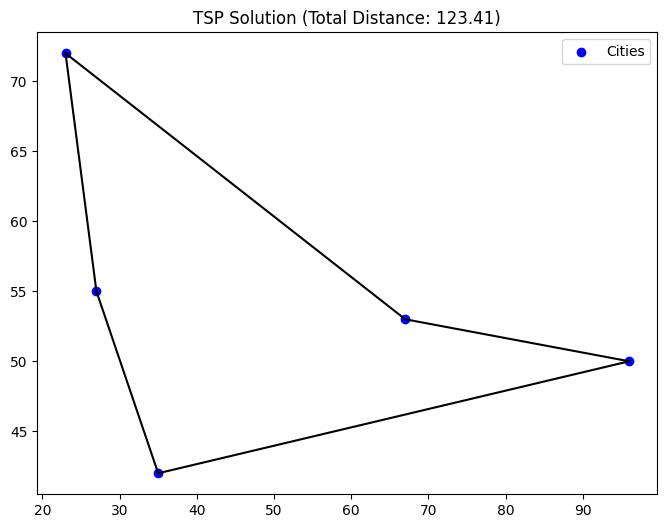

In [ ]:
import random
import math
import itertools
import matplotlib.pyplot as plt

def generate_random_cities(num_cities, max_coordinate):
    cities = []
    for _ in range(num_cities):
        x = random.randint(0, max_coordinate)
        y = random.randint(0, max_coordinate)
        cities.append((x, y))
    return cities

def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

def generate_initial_path(num_cities):
    path = list(range(num_cities))
    random.shuffle(path)
    return path

def hill_climbing(cities, max_iterations):
    current_path = generate_initial_path(len(cities))
    current_distance = calculate_total_distance(current_path, cities)

    for _ in range(max_iterations):
        neighbors = []
        for i in range(len(current_path)):
            for j in range(i + 1, len(current_path)):
                neighbor_path = current_path[:i] + list(reversed(current_path[i:j])) + current_path[j:]
                neighbors.append(neighbor_path)

        best_neighbor = min(neighbors, key=lambda path: calculate_total_distance(path, cities))
        best_distance = calculate_total_distance(best_neighbor, cities)

        if best_distance < current_distance:
            current_path = best_neighbor
            current_distance = best_distance
        else:
            break

    return current_path, current_distance

def get_all_possible_routes_and_costs(cities):
    all_routes = list(itertools.permutations(range(len(cities))))
    route_costs = [calculate_total_distance(route, cities) for route in all_routes]
    return all_routes, route_costs

def plot_cities_and_path(cities, path):
    x, y = zip(*cities)
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, marker='o', color='b', label='Cities')
    for i in range(len(path) - 1):
        plt.plot([cities[path[i]][0], cities[path[i + 1]][0]],
                 [cities[path[i]][1], cities[path[i + 1]][1]], 'k-')
    plt.plot([cities[path[-1]][0], cities[path[0]][0]],
             [cities[path[-1]][1], cities[path[0]][1]], 'k-')
    plt.title(f'TSP Solution (Total Distance: {calculate_total_distance(path, cities):.2f})')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    num_cities = 5  # Change the number of cities as needed
    max_coordinate = 100  # Maximum x and y coordinates
    max_iterations = 10000  # Maximum number of iterations

    cities = generate_random_cities(num_cities, max_coordinate)

    # Print all possible routes and their costs
    all_routes, route_costs = get_all_possible_routes_and_costs(cities)
    for i, route in enumerate(all_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    start_city = int(input(f"Enter the number of the start city (0 to {num_cities - 1}): "))
    goal_city = int(input(f"Enter the number of the goal city (0 to {num_cities - 1}): "))

    if start_city == goal_city:
        print("Start and goal cities are the same.")
    else:
        optimal_path, optimal_distance = hill_climbing(cities, max_iterations)
        print("\nCity Coordinates:")
        for i, city in enumerate(cities):
            print(f"City {i}: ({city[0]}, {city[1]})")

        print("\nOptimal Path:")
        print(optimal_path)
        print("Total Distance:", optimal_distance)

        plot_cities_and_path(cities, optimal_path)


Enter the number of the start city (0 to 4): 0
Enter the number of the goal city (0 to 4): 2
Route 1: (0, 4, 3, 1, 2), Cost: 257.76
Route 2: (0, 4, 1, 3, 2), Cost: 309.70
Route 3: (0, 3, 1, 4, 2), Cost: 257.12
Route 4: (0, 1, 3, 4, 2), Cost: 291.33
Route 5: (0, 3, 4, 1, 2), Cost: 216.97
Route 6: (0, 1, 4, 3, 2), Cost: 199.23

Optimal Path:
(0, 4, 3, 1, 2)
Total Distance: 257.76


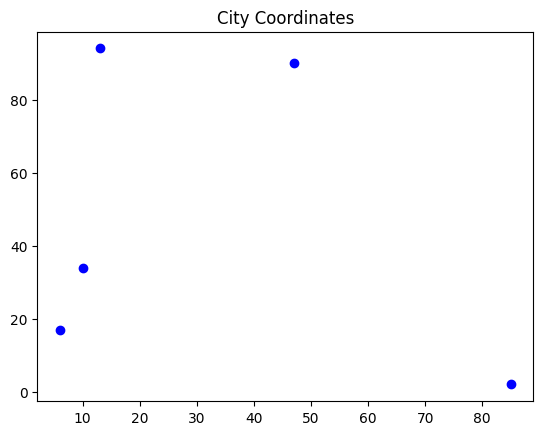

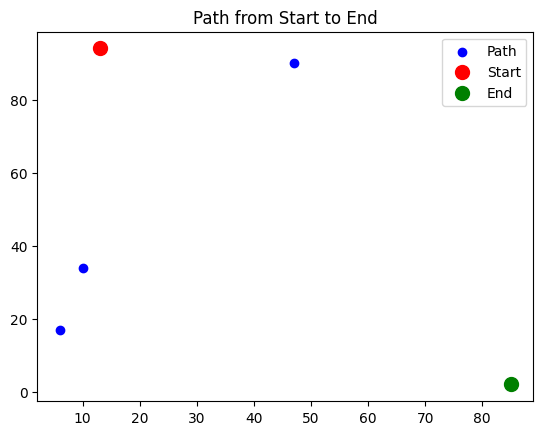

In [ ]:
import itertools
import math
import matplotlib.pyplot as plt

def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

def generate_possible_routes(start, goal, num_cities):
    cities = list(range(num_cities))
    cities.remove(start)
    cities.remove(goal)
    possible_routes = list(itertools.permutations(cities))
    for i in range(len(possible_routes)):
        possible_routes[i] = (start,) + possible_routes[i] + (goal,)
    return possible_routes

def calculate_possible_route_costs(cities, possible_routes):
    route_costs = []
    for route in possible_routes:
        cost = calculate_total_distance(route, cities)
        route_costs.append(cost)
    return route_costs

def main():
    num_cities = 5  # Change this to the number of cities you have

    # Specific city coordinates
    cities = {
        0: (13, 94),
        1: (6, 17),
        2: (85, 2),
        3: (10, 34),
        4: (47, 90),
    }

    start_city = int(input(f"Enter the number of the start city (0 to {num_cities - 1}): "))
    goal_city = int(input(f"Enter the number of the goal city (0 to {num_cities - 1}): "))

    possible_routes = generate_possible_routes(start_city, goal_city, num_cities)
    route_costs = calculate_possible_route_costs(cities, possible_routes)

    # Sort routes by cost
    sorted_routes = [route for _, route in sorted(zip(route_costs, possible_routes))]

    # Print all possible routes and their costs
    for i, route in enumerate(sorted_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    # Print the optimal path and its total distance
    optimal_route = sorted_routes[0]
    optimal_cost = route_costs[0]
    print("\nOptimal Path:")
    print(optimal_route)
    print(f"Total Distance: {optimal_cost:.2f}")

    # Create a graph of all city coordinates
    plt.figure(1)
    plt.title("City Coordinates")
    x, y = zip(*list(cities.values()))
    plt.scatter(x, y, label="Cities", color='blue', marker='o')

    # Create a graph for the path from start to end with start city in red and end city in green
    plt.figure(2)
    plt.title("Path from Start to End")
    x, y = zip(*[cities[i] for i in optimal_route])
    plt.scatter(x, y, label="Path", color='blue', marker='o')
    plt.scatter(x[0], y[0], label="Start", color='red', marker='o', s=100)
    plt.scatter(x[-1], y[-1], label="End", color='green', marker='o', s=100)

    # Show the graphs
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Enter the number of the start city (0 to 4): 2
Enter the number of the goal city (0 to 4): 4
Possible Routes:
Route 1: (2, 0, 1, 3, 4), Cost: 188.51
Route 2: (2, 0, 3, 1, 4), Cost: 199.58
Route 3: (2, 1, 0, 3, 4), Cost: 196.22
Route 4: (2, 1, 3, 0, 4), Cost: 152.30
Route 5: (2, 3, 0, 1, 4), Cost: 194.73
Route 6: (2, 3, 1, 0, 4), Cost: 139.74

Optimal Path:
(2, 3, 1, 0, 4)
Total Distance: 139.74


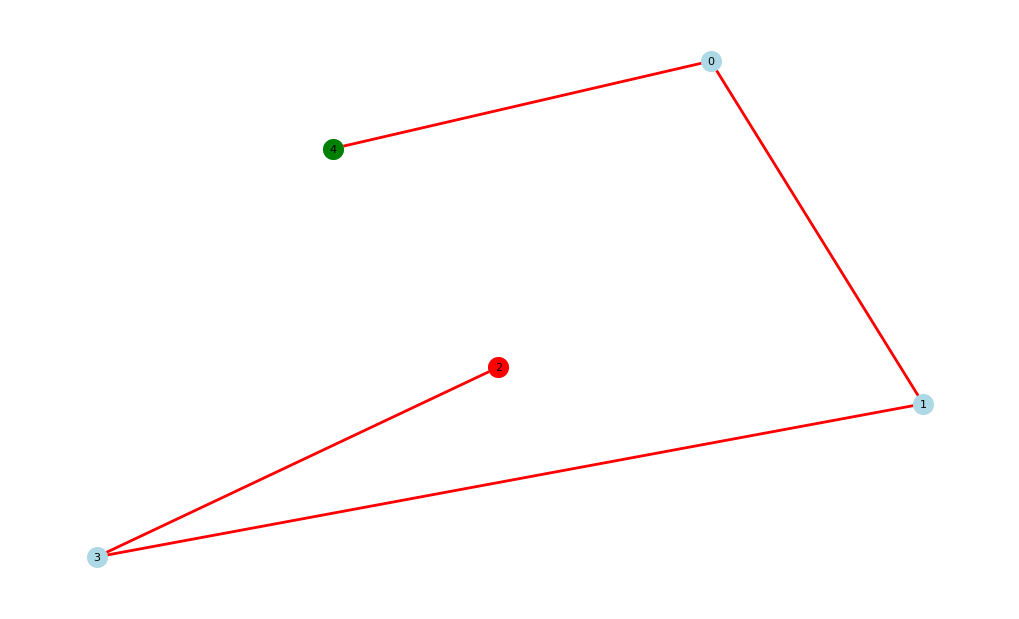

In [ ]:
import itertools
import math
import networkx as nx
import matplotlib.pyplot as plt

# Define the city coordinates
city_coordinates = [(36, 89), (45, 42), (27, 47), (10, 21), (20, 77)]

# Function to calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Function to generate all possible routes from start city to goal city
def generate_possible_routes(start_city, goal_city, num_cities):
    all_cities = list(range(num_cities))
    all_cities.remove(start_city)
    all_cities.remove(goal_city)
    possible_routes = list(itertools.permutations(all_cities))
    for i in range(len(possible_routes)):
        possible_routes[i] = (start_city,) + possible_routes[i] + (goal_city,)
    return possible_routes

# Function to calculate the costs of possible routes
def calculate_possible_route_costs(cities, possible_routes):
    route_costs = []
    for route in possible_routes:
        distance = calculate_total_distance(route, cities)
        route_costs.append(distance)
    return route_costs

if __name__ == "__main__":
    num_cities = len(city_coordinates)

    start_city = int(input(f"Enter the number of the start city (0 to {num_cities - 1}): "))
    goal_city = int(input(f"Enter the number of the goal city (0 to {num_cities - 1}): "))

    possible_routes = generate_possible_routes(start_city, goal_city, num_cities)
    route_costs = calculate_possible_route_costs(city_coordinates, possible_routes)

    print("Possible Routes:")
    for i, route in enumerate(possible_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    optimal_path_index = route_costs.index(min(route_costs))
    optimal_path = possible_routes[optimal_path_index]
    optimal_cost = route_costs[optimal_path_index]

    print("\nOptimal Path:")
    print(optimal_path)
    print(f"Total Distance: {optimal_cost:.2f}")

    # Create a graph to visualize the city coordinates and the path
    G = nx.Graph()

    # Add nodes for cities
    for i, (x, y) in enumerate(city_coordinates):
        G.add_node(i, pos=(x, y))

    # Add edges to connect cities based on the optimal path
    for i in range(len(optimal_path) - 1):
        G.add_edge(optimal_path[i], optimal_path[i + 1])

    pos = nx.get_node_attributes(G, 'pos')

    # Draw the city coordinates
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=200, node_color='lightblue', font_size=8)

    # Highlight start city in red
    start_city_pos = pos[start_city]
    nx.draw_networkx_nodes(G, pos, nodelist=[start_city], node_size=200, node_color='red')

    # Highlight goal city in green
    goal_city_pos = pos[goal_city]
    nx.draw_networkx_nodes(G, pos, nodelist=[goal_city], node_size=200, node_color='green')

    # Draw the path
    path_edges = list(zip(optimal_path, optimal_path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.show()


Enter the number of the start city (0 to 4): 0
Enter the number of the goal city (0 to 4): 3

Optimal Path:
(0, 4, 2, 1, 3)
Total Distance: 227.96


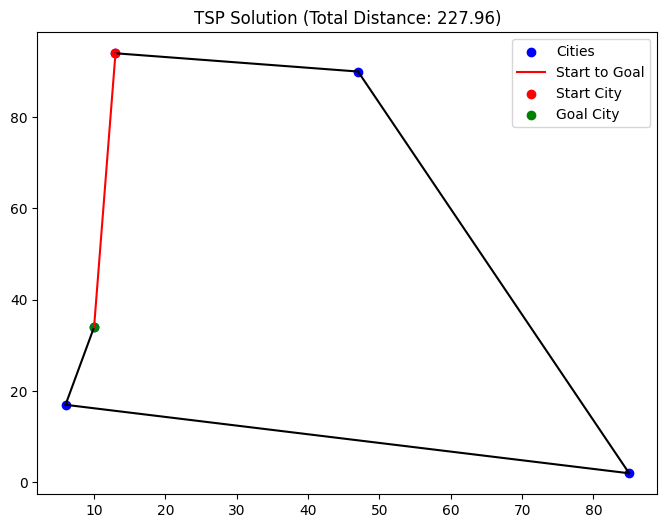

In [ ]:
import itertools
import math
import matplotlib.pyplot as plt

# Define the city coordinates
city_coordinates = [(13, 94), (6, 17), (85, 2), (10, 34), (47, 90)]

# Function to calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Function to generate all possible routes from start city to goal city
def generate_possible_routes(start_city, goal_city, num_cities):
    all_cities = list(range(num_cities))
    all_cities.remove(start_city)
    all_cities.remove(goal_city)
    possible_routes = list(itertools.permutations(all_cities))
    for i in range(len(possible_routes)):
        possible_routes[i] = (start_city,) + possible_routes[i] + (goal_city,)
    return possible_routes

# Function to calculate the costs of possible routes
def calculate_possible_route_costs(cities, possible_routes):
    route_costs = []
    for route in possible_routes:
        distance = calculate_total_distance(route, cities)
        route_costs.append(distance)
    return route_costs

if __name__ == "__main__":
    num_cities = len(city_coordinates)

    start_city = int(input(f"Enter the number of the start city (0 to {num_cities - 1}): "))
    goal_city = int(input(f"Enter the number of the goal city (0 to {num_cities - 1}): "))

    possible_routes = generate_possible_routes(start_city, goal_city, num_cities)
    route_costs = calculate_possible_route_costs(city_coordinates, possible_routes)

    optimal_path_index = route_costs.index(min(route_costs))
    optimal_path = possible_routes[optimal_path_index]
    optimal_cost = route_costs[optimal_path_index]

    print("\nOptimal Path:")
    print(optimal_path)
    print(f"Total Distance: {optimal_cost:.2f}")

    # Plot the cities, the optimal path, and start/goal cities
    x, y = zip(*city_coordinates)
    plt.figure(figsize=(8, 6))

    # Plot cities in blue
    plt.scatter(x, y, marker='o', color='b', label='Cities')

    # Plot the optimal path in black
    for i in range(len(optimal_path) - 1):
        plt.plot([city_coordinates[optimal_path[i]][0], city_coordinates[optimal_path[i + 1]][0]],
                 [city_coordinates[optimal_path[i]][1], city_coordinates[optimal_path[i + 1]][1]], 'k-')

    # Plot a line connecting start and goal cities in red
    plt.plot([city_coordinates[start_city][0], city_coordinates[goal_city][0]],
             [city_coordinates[start_city][1], city_coordinates[goal_city][1]], 'r-', label='Start to Goal')

    # Mark start city as red
    plt.scatter(city_coordinates[start_city][0], city_coordinates[start_city][1], marker='o', color='r', label='Start City')

    # Mark goal city as green
    plt.scatter(city_coordinates[goal_city][0], city_coordinates[goal_city][1], marker='o', color='g', label='Goal City')

    plt.title(f'TSP Solution (Total Distance: {optimal_cost:.2f})')
    plt.legend()
    plt.show()


Enter the number of the start city (0 to 4): 2
Enter the number of the goal city (0 to 4): 4

Possible Routes between Start and Goal City:
Route 1: (2, 0, 1, 3, 4), Cost: 278.73
Route 2: (2, 0, 3, 1, 4), Cost: 278.09
Route 3: (2, 1, 0, 3, 4), Cost: 284.92
Route 4: (2, 1, 3, 0, 4), Cost: 192.19
Route 5: (2, 3, 0, 1, 4), Cost: 302.66
Route 6: (2, 3, 1, 0, 4), Cost: 210.56

Optimal Path:
(2, 1, 3, 0, 4)
Total Distance: 192.19


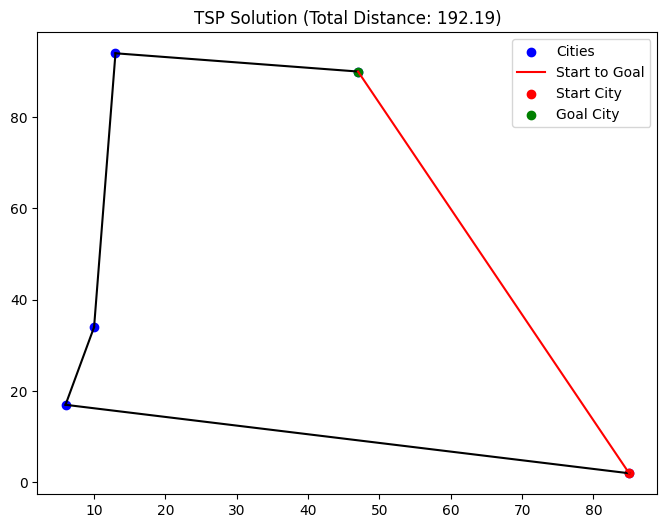

In [ ]:
import itertools
import math
import matplotlib.pyplot as plt

# Define the city coordinates
city_coordinates = [(13, 94), (6, 17), (85, 2), (10, 34), (47, 90)]

# Function to calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Function to generate all possible routes from start city to goal city
def generate_possible_routes(start_city, goal_city, num_cities):
    all_cities = list(range(num_cities))
    all_cities.remove(start_city)
    all_cities.remove(goal_city)
    possible_routes = list(itertools.permutations(all_cities))
    for i in range(len(possible_routes)):
        possible_routes[i] = (start_city,) + possible_routes[i] + (goal_city,)
    return possible_routes

# Function to calculate the costs of possible routes
def calculate_possible_route_costs(cities, possible_routes):
    route_costs = []
    for route in possible_routes:
        distance = calculate_total_distance(route, cities)
        route_costs.append(distance)
    return route_costs

if __name__ == "__main__":
    num_cities = len(city_coordinates)

    start_city = int(input(f"Enter the number of the start city (0 to {num_cities - 1}): "))
    goal_city = int(input(f"Enter the number of the goal city (0 to {num_cities - 1}): "))

    possible_routes = generate_possible_routes(start_city, goal_city, num_cities)
    route_costs = calculate_possible_route_costs(city_coordinates, possible_routes)

    print("\nPossible Routes between Start and Goal City:")
    for i, route in enumerate(possible_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    optimal_path_index = route_costs.index(min(route_costs))
    optimal_path = possible_routes[optimal_path_index]
    optimal_cost = route_costs[optimal_path_index]

    print("\nOptimal Path:")
    print(optimal_path)
    print(f"Total Distance: {optimal_cost:.2f}")

    # Plot the cities, the optimal path, and start/goal cities
    x, y = zip(*city_coordinates)
    plt.figure(figsize=(8, 6))

    # Plot cities in blue
    plt.scatter(x, y, marker='o', color='b', label='Cities')

    # Plot the optimal path in black
    for i in range(len(optimal_path) - 1):
        plt.plot([city_coordinates[optimal_path[i]][0], city_coordinates[optimal_path[i + 1]][0]],
                 [city_coordinates[optimal_path[i]][1], city_coordinates[optimal_path[i + 1]][1]], 'k-')

    # Plot a line connecting start and goal cities in red
    plt.plot([city_coordinates[start_city][0], city_coordinates[goal_city][0]],
             [city_coordinates[start_city][1], city_coordinates[goal_city][1]], 'r-', label='Start to Goal')

    # Mark start city as red
    plt.scatter(city_coordinates[start_city][0], city_coordinates[start_city][1], marker='o', color='r', label='Start City')

    # Mark goal city as green
    plt.scatter(city_coordinates[goal_city][0], city_coordinates[goal_city][1], marker='o', color='g', label='Goal City')

    plt.title(f'TSP Solution (Total Distance: {optimal_cost:.2f})')
    plt.legend()
    plt.show()


Enter the number of the start city (0 to 4): 4
Enter the number of the goal city (0 to 4): 1

Possible Routes between Start and Goal City:
Route 1: (4, 0, 2, 3, 1), Cost: 250.06
Route 2: (4, 0, 3, 2, 1), Cost: 256.26
Route 3: (4, 2, 0, 3, 1), Cost: 290.22
Route 4: (4, 2, 3, 0, 1), Cost: 314.79
Route 5: (4, 3, 0, 2, 1), Cost: 324.43
Route 6: (4, 3, 2, 0, 1), Cost: 342.80

Optimal Path:
(4, 0, 2, 3, 1)
Total Distance: 250.06


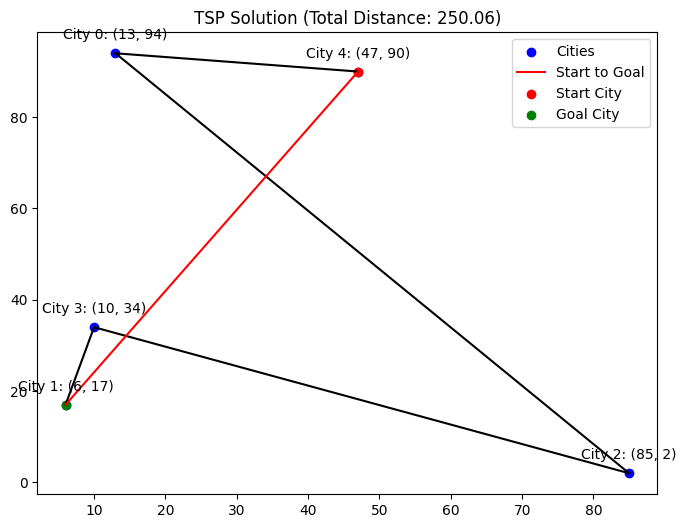

In [ ]:
import itertools
import math
import matplotlib.pyplot as plt

# Define the city coordinates
city_coordinates = [(13, 94), (6, 17), (85, 2), (10, 34), (47, 90)]

# Function to calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Function to generate all possible routes from start city to goal city
def generate_possible_routes(start_city, goal_city, num_cities):
    all_cities = list(range(num_cities))
    all_cities.remove(start_city)
    all_cities.remove(goal_city)
    possible_routes = list(itertools.permutations(all_cities))
    for i in range(len(possible_routes)):
        possible_routes[i] = (start_city,) + possible_routes[i] + (goal_city,)
    return possible_routes

# Function to calculate the costs of possible routes
def calculate_possible_route_costs(cities, possible_routes):
    route_costs = []
    for route in possible_routes:
        distance = calculate_total_distance(route, cities)
        route_costs.append(distance)
    return route_costs

# Plot the cities and their coordinates
def plot_cities_and_path(cities, path, start_city, goal_city):
    x, y = zip(*cities)
    plt.figure(figsize=(8, 6))

    # Plot cities in blue
    plt.scatter(x, y, marker='o', color='b', label='Cities')

    # Plot city coordinates
    for i, (x_coord, y_coord) in enumerate(cities):
        plt.annotate(f'City {i}: ({x_coord}, {y_coord})', (x_coord, y_coord), textcoords="offset points", xytext=(0, 10), ha='center')

    # Plot the optimal path in black
    for i in range(len(path) - 1):
        plt.plot([cities[path[i]][0], cities[path[i + 1]][0]],
                 [cities[path[i]][1], cities[path[i + 1]][1]], 'k-')

    # Plot a line connecting start and goal cities in red
    # plt.plot([cities[start_city][0], cities[goal_city][0]],
    #          [cities[start_city][1], cities[goal_city][1]], 'r-', label='Start to Goal')

    # Mark start city as red
    plt.scatter(cities[start_city][0], cities[start_city][1], marker='o', color='r', label='Start City')

    # Mark goal city as green
    plt.scatter(cities[goal_city][0], cities[goal_city][1], marker='o', color='g', label='Goal City')

    plt.title(f'TSP Solution (Total Distance: {calculate_total_distance(path, cities):.2f})')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    num_cities = len(city_coordinates)

    start_city = int(input(f"Enter the number of the start city (0 to {num_cities - 1}): "))
    goal_city = int(input(f"Enter the number of the goal city (0 to {num_cities - 1}): "))

    possible_routes = generate_possible_routes(start_city, goal_city, num_cities)
    route_costs = calculate_possible_route_costs(city_coordinates, possible_routes)

    print("\nPossible Routes between Start and Goal City:")
    for i, route in enumerate(possible_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    optimal_path_index = route_costs.index(min(route_costs))
    optimal_path = possible_routes[optimal_path_index]
    optimal_cost = route_costs[optimal_path_index]

    print("\nOptimal Path:")
    print(optimal_path)
    print(f"Total Distance: {optimal_cost:.2f}")

    # Plot the cities and their coordinates
    plot_cities_and_path(city_coordinates, optimal_path, start_city, goal_city)


Enter the number of the start city (0 to 4): 2
Enter the number of the goal city (0 to 4): 4

Possible Routes between Start and Goal City:
Route 1: (2, 0, 1, 3, 4), Cost: 278.73
Route 2: (2, 0, 3, 1, 4), Cost: 278.09
Route 3: (2, 1, 0, 3, 4), Cost: 284.92
Route 4: (2, 1, 3, 0, 4), Cost: 192.19
Route 5: (2, 3, 0, 1, 4), Cost: 302.66
Route 6: (2, 3, 1, 0, 4), Cost: 210.56

Optimal Path:
(2, 1, 3, 0, 4)
Total Distance: 192.19


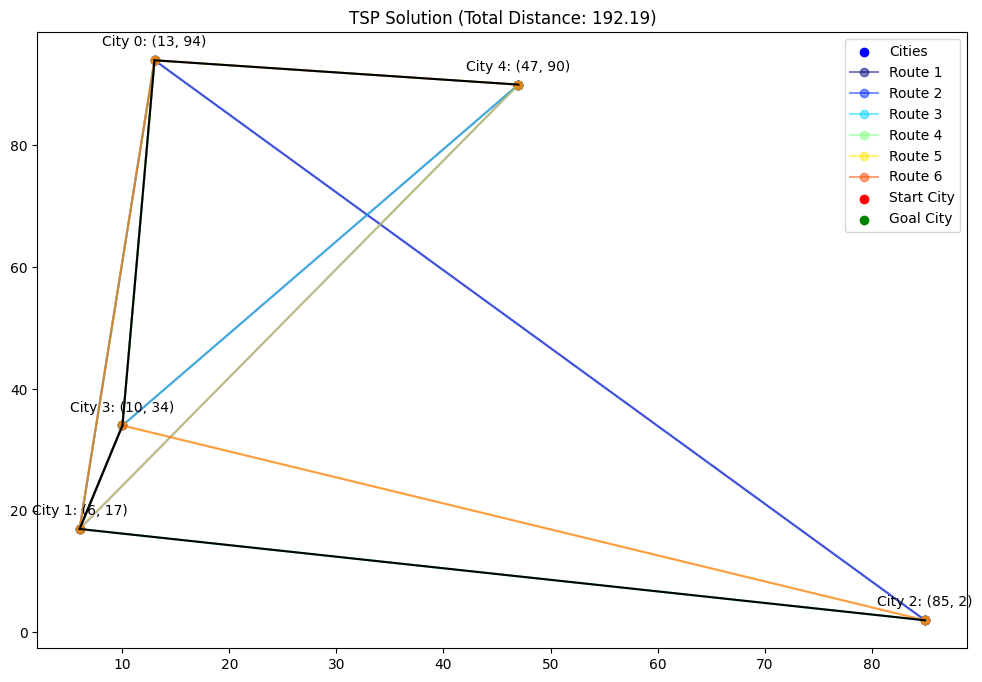

In [ ]:
import itertools
import math
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

# Define the city coordinates
city_coordinates = [(13, 94), (6, 17), (85, 2), (10, 34), (47, 90)]

# Function to calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Function to generate all possible routes from start city to goal city
def generate_possible_routes(start_city, goal_city, num_cities):
    all_cities = list(range(num_cities))
    all_cities.remove(start_city)
    all_cities.remove(goal_city)
    possible_routes = list(itertools.permutations(all_cities))
    for i in range(len(possible_routes)):
        possible_routes[i] = (start_city,) + possible_routes[i] + (goal_city,)
    return possible_routes

# Function to calculate the costs of possible routes
def calculate_possible_route_costs(cities, possible_routes):
    route_costs = []
    for route in possible_routes:
        distance = calculate_total_distance(route, cities)
        route_costs.append(distance)
    return route_costs

# Plot the cities and their coordinates
def plot_cities_and_paths(cities, routes, optimal_path, start_city, goal_city):
    x, y = zip(*cities)
    plt.figure(figsize=(12, 8))

    # Plot cities in blue
    plt.scatter(x, y, marker='o', color='b', label='Cities')

    # Plot city coordinates
    for i, (x_coord, y_coord) in enumerate(cities):
        plt.annotate(f'City {i}: ({x_coord}, {y_coord})', (x_coord, y_coord), textcoords="offset points", xytext=(0, 10), ha='center')

    # Plot the possible routes in different colors
    for i, route in enumerate(routes):
        route_x = [cities[city][0] for city in route]
        route_y = [cities[city][1] for city in route]
        color = to_rgba(plt.cm.jet(i / len(routes)), alpha=0.5)
        plt.plot(route_x, route_y, marker='o', color=color, label=f'Route {i + 1}')

    # Plot the optimal path in black
    for i in range(len(optimal_path) - 1):
        plt.plot([cities[optimal_path[i]][0], cities[optimal_path[i + 1]][0]],
                 [cities[optimal_path[i]][1], cities[optimal_path[i + 1]][1]], 'k-')

    # Mark start city as red
    plt.scatter(cities[start_city][0], cities[start_city][1], marker='o', color='r', label='Start City')

    # Mark goal city as green
    plt.scatter(cities[goal_city][0], cities[goal_city][1], marker='o', color='g', label='Goal City')

    plt.title(f'TSP Solution (Total Distance: {calculate_total_distance(optimal_path, cities):.2f})')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    num_cities = len(city_coordinates)

    start_city = int(input(f"Enter the number of the start city (0 to {num_cities - 1}): "))
    goal_city = int(input(f"Enter the number of the goal city (0 to {num_cities - 1}): "))

    possible_routes = generate_possible_routes(start_city, goal_city, num_cities)
    route_costs = calculate_possible_route_costs(city_coordinates, possible_routes)

    print("\nPossible Routes between Start and Goal City:")
    for i, route in enumerate(possible_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    optimal_path_index = route_costs.index(min(route_costs))
    optimal_path = possible_routes[optimal_path_index]
    optimal_cost = route_costs[optimal_path_index]

    print("\nOptimal Path:")
    print(optimal_path)
    print(f"Total Distance: {optimal_cost:.2f}")

    # Plot the cities and their coordinates, along with all possible routes
    plot_cities_and_paths(city_coordinates, possible_routes, optimal_path, start_city, goal_city)


Enter the number of the start city (0 to 4): 4
Enter the number of the goal city (0 to 4): 3
Route 1: [4, 0, 1, 2, 3], Cost: 242.10
Route 2: [4, 0, 2, 1, 3], Cost: 332.98
Route 3: [4, 1, 0, 2, 3], Cost: 242.02
Route 4: [4, 1, 2, 0, 3], Cost: 315.24
Route 5: [4, 2, 0, 1, 3], Cost: 235.83
Route 6: [4, 2, 1, 0, 3], Cost: 218.17

Optimal Path:
[4, 2, 1, 0, 3]
Total Distance: 218.17


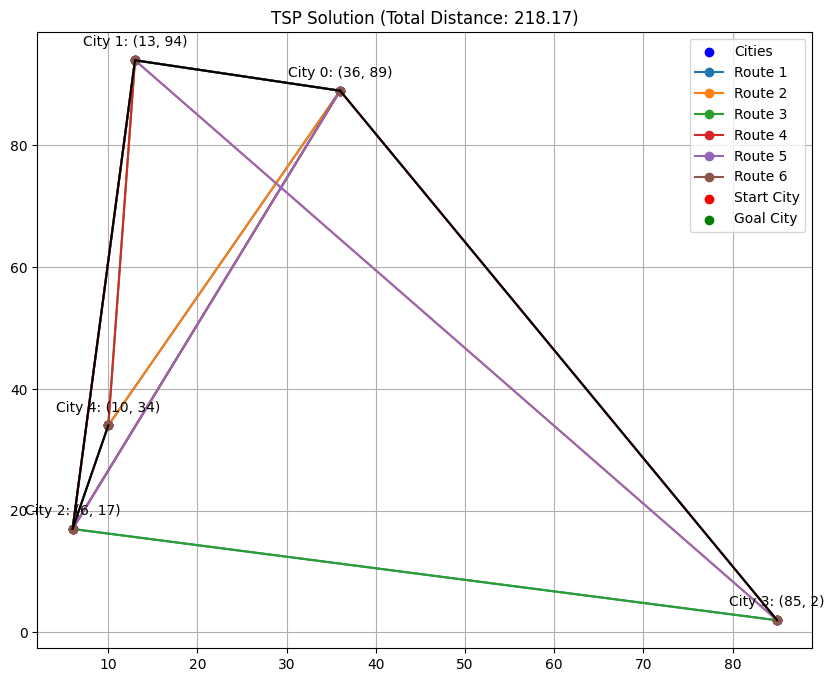

In [ ]:
import itertools
import math
import matplotlib.pyplot as plt

# Function to calculate the Euclidean distance between two points
def calculate_distance(city1, city2):
    return math.dist(city1, city2)

# Function to calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = calculate_distance(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Generate all possible routes from start to end city
def generate_possible_routes(start, end, num_cities):
    all_cities = set(range(num_cities))
    all_cities.discard(start)
    all_cities.discard(end)
    possible_routes = []
    for permutation in itertools.permutations(all_cities):
        route = [start] + list(permutation) + [end]
        possible_routes.append(route)
    return possible_routes

# Calculate the costs of all possible routes
def calculate_possible_route_costs(cities, possible_routes):
    route_costs = []
    for route in possible_routes:
        cost = calculate_total_distance(route, cities)
        route_costs.append(cost)
    return route_costs

# Plot the cities, all possible routes, and the optimal path
def plot_cities_and_paths(cities, possible_routes, optimal_path, start_city, goal_city):
    x, y = zip(*cities)
    plt.figure(figsize=(10, 8))

    # Plot city coordinates
    for i, (x_coord, y_coord) in enumerate(cities):
        plt.annotate(f'City {i}: ({x_coord}, {y_coord})', (x_coord, y_coord),
                     textcoords="offset points", xytext=(0, 10), ha='center')

    # Plot the cities in blue
    plt.scatter(x, y, marker='o', color='b', label='Cities')

    # Plot all possible routes with different colors
    for i, route in enumerate(possible_routes):
        plt.plot([cities[route[j]][0] for j in range(len(route))],
                 [cities[route[j]][1] for j in range(len(route))], 'o-', label=f'Route {i + 1}')

    # Plot the optimal path in black
    for i in range(len(optimal_path) - 1):
        plt.plot([cities[optimal_path[i]][0], cities[optimal_path[i + 1]][0]],
                 [cities[optimal_path[i]][1], cities[optimal_path[i + 1]][1]], 'k-')

    # Mark start city as red
    plt.scatter(cities[start_city][0], cities[start_city][1], marker='o', color='r', label='Start City')

    # Mark goal city as green
    plt.scatter(cities[goal_city][0], cities[goal_city][1], marker='o', color='g', label='Goal City')

    plt.title(f'TSP Solution (Total Distance: {calculate_total_distance(optimal_path, cities):.2f})')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

if __name__ == "__main__":
    # Define the coordinates of cities
    city_coordinates = [(36, 89), (13, 94), (6, 17), (85, 2), (10, 34)]

    # Get the number of cities
    num_cities = len(city_coordinates)

    # Prompt the user to enter the start and goal cities
    start_city = int(input(f"Enter the number of the start city (0 to {num_cities - 1}): "))
    goal_city = int(input(f"Enter the number of the goal city (0 to {num_cities - 1}): "))

    # Generate all possible routes from start to goal city
    possible_routes = generate_possible_routes(start_city, goal_city, num_cities)
    route_costs = calculate_possible_route_costs(city_coordinates, possible_routes)

    # Find the optimal path (the one with the minimum cost)
    min_cost_index = route_costs.index(min(route_costs))
    optimal_path = possible_routes[min_cost_index]

    # Print all possible routes and their costs
    for i, route in enumerate(possible_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    # Print the optimal path and its total distance
    print("\nOptimal Path:")
    print(optimal_path)
    print(f"Total Distance: {calculate_total_distance(optimal_path, city_coordinates):.2f}")

    # Plot the cities, all possible routes, and the optimal path
    plot_cities_and_paths(city_coordinates, possible_routes, optimal_path, start_city, goal_city)


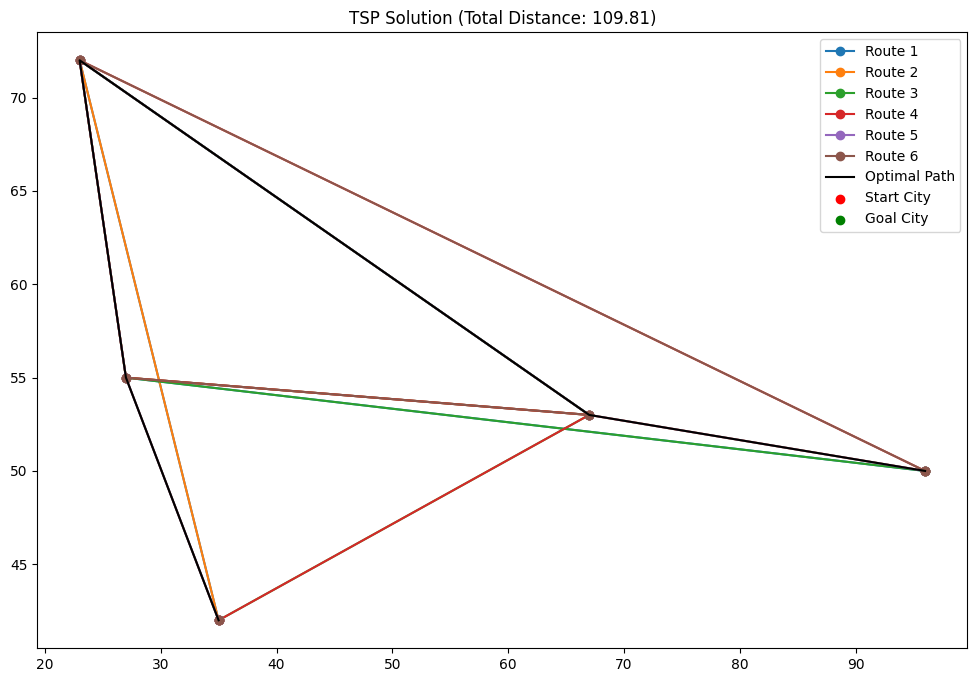

In [ ]:
import itertools
import matplotlib.pyplot as plt
import math

# Function to calculate total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Function to generate all possible routes between two cities
def generate_possible_routes(start_city, goal_city, num_cities):
    all_cities = list(range(num_cities))
    all_cities.remove(start_city)
    all_cities.remove(goal_city)

    possible_routes = list(itertools.permutations(all_cities, num_cities - 2))
    for i in range(len(possible_routes)):
        possible_routes[i] = (start_city,) + possible_routes[i] + (goal_city,)

    return possible_routes

# Plot the cities, all possible routes, and the optimal path
def plot_cities_and_paths(city_coordinates, possible_routes, optimal_path, start_city, goal_city):
    x, y = zip(*city_coordinates)
    plt.figure(figsize=(12, 8))

    # Plot all possible routes with different colors
    for i, route in enumerate(possible_routes):
        plt.plot([city_coordinates[city][0] for city in route],
                 [city_coordinates[city][1] for city in route], 'o-', label=f'Route {i + 1}')

    # Plot the optimal path in black
    plt.plot([city_coordinates[city][0] for city in optimal_path],
             [city_coordinates[city][1] for city in optimal_path], 'k-', label='Optimal Path')

    # Mark start city as red
    plt.scatter(city_coordinates[start_city][0], city_coordinates[start_city][1],
                marker='o', color='r', label='Start City')

    # Mark goal city as green
    plt.scatter(city_coordinates[goal_city][0], city_coordinates[goal_city][1],
                marker='o', color='g', label='Goal City')

    plt.title(f'TSP Solution (Total Distance: {calculate_total_distance(optimal_path, city_coordinates):.2f})')
    plt.legend()
    plt.show()

# Define the number of cities and their coordinates
num_cities = 5
city_coordinates = [(35, 42), (23, 72), (96, 50), (67, 53), (27, 55)]

# Define the start and goal cities
start_city = 0
goal_city = 2

# Generate all possible routes
possible_routes = generate_possible_routes(start_city, goal_city, num_cities)

# Calculate the cost of each route
route_costs = [calculate_total_distance(route, city_coordinates) for route in possible_routes]

# Find the optimal path
min_cost_index = route_costs.index(min(route_costs))
optimal_path = possible_routes[min_cost_index]

# Plot the cities, all possible routes, and the optimal path
plot_cities_and_paths(city_coordinates, possible_routes, optimal_path, start_city, goal_city)


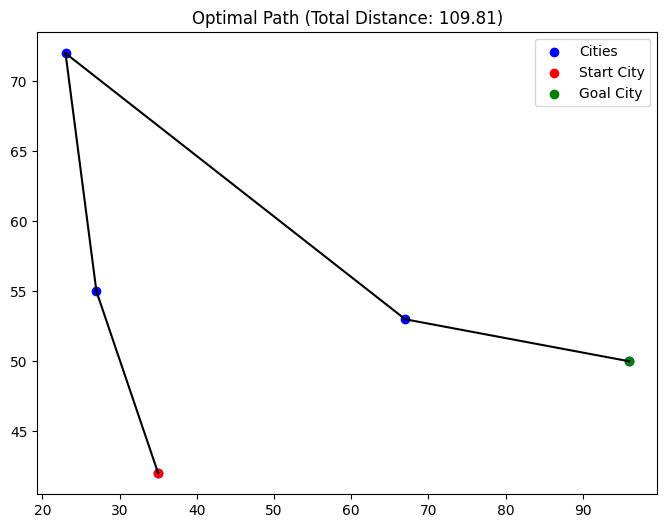

In [ ]:
import itertools
import matplotlib.pyplot as plt
import math

# Function to calculate total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = math.dist(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Function to generate all possible routes between two cities
def generate_possible_routes(start_city, goal_city, num_cities):
    all_cities = list(range(num_cities))
    all_cities.remove(start_city)
    all_cities.remove(goal_city)

    possible_routes = list(itertools.permutations(all_cities, num_cities - 2))
    for i in range(len(possible_routes)):
        possible_routes[i] = (start_city,) + possible_routes[i] + (goal_city,)

    return possible_routes

# Plot the cities and the optimal path in a separate graph
def plot_optimal_path(city_coordinates, optimal_path, start_city, goal_city):
    x, y = zip(*city_coordinates)
    plt.figure(figsize=(8, 6))

    # Plot the cities in blue
    plt.scatter(x, y, marker='o', color='b', label='Cities')

    # Plot the optimal path in black
    for i in range(len(optimal_path) - 1):
        plt.plot([city_coordinates[optimal_path[i]][0], city_coordinates[optimal_path[i + 1]][0]],
                 [city_coordinates[optimal_path[i]][1], city_coordinates[optimal_path[i + 1]][1]], 'k-')

    # Mark the start city in red
    plt.scatter(city_coordinates[start_city][0], city_coordinates[start_city][1],
                marker='o', color='r', label='Start City')

    # Mark the goal city in green
    plt.scatter(city_coordinates[goal_city][0], city_coordinates[goal_city][1],
                marker='o', color='g', label='Goal City')

    plt.title(f'Optimal Path (Total Distance: {calculate_total_distance(optimal_path, city_coordinates):.2f})')
    plt.legend()
    plt.show()

# Define the number of cities and their coordinates
num_cities = 5
city_coordinates = [(35, 42), (23, 72), (96, 50), (67, 53), (27, 55)]

# Define the start and goal cities
start_city = 0
goal_city = 2

# Generate all possible routes
possible_routes = generate_possible_routes(start_city, goal_city, num_cities)

# Calculate the cost of each route
route_costs = [calculate_total_distance(route, city_coordinates) for route in possible_routes]

# Find the optimal path
min_cost_index = route_costs.index(min(route_costs))
optimal_path = possible_routes[min_cost_index]

# Plot the optimal path in a separate graph
plot_optimal_path(city_coordinates, optimal_path, start_city, goal_city)


Enter the number of the start city (0 to 4): 3
Enter the number of the goal city (0 to 4): 1
Route 1: [3, 0, 2, 4, 1], Cost: 255.39
Route 2: [3, 0, 4, 2, 1], Cost: 255.47
Route 3: [3, 2, 0, 4, 1], Cost: 279.32
Route 4: [3, 2, 4, 0, 1], Cost: 182.25
Route 5: [3, 4, 0, 2, 1], Cost: 297.69
Route 6: [3, 4, 2, 0, 1], Cost: 200.54

Optimal Path:
[3, 2, 4, 0, 1]
Total Distance: 182.25


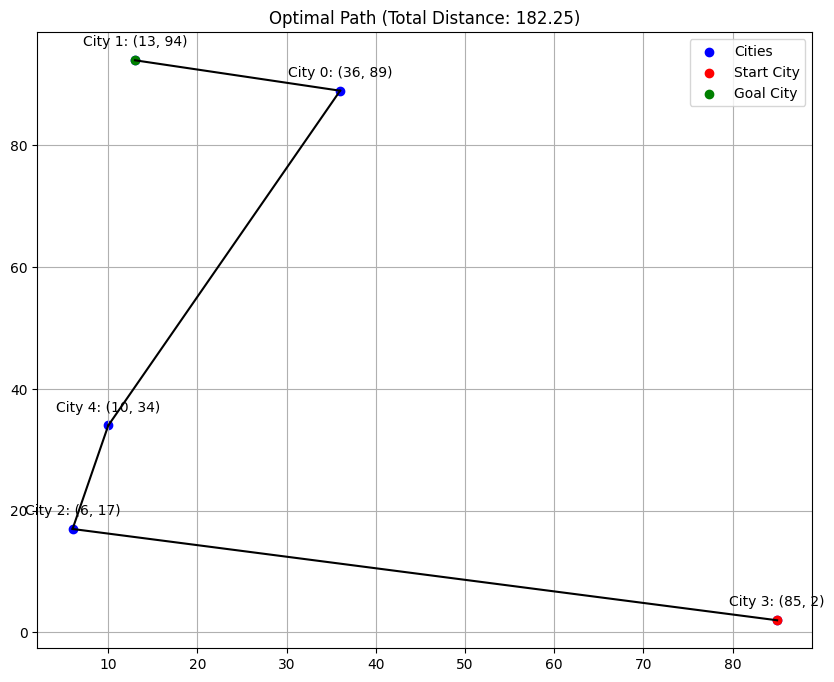

In [ ]:
import itertools
import math
import matplotlib.pyplot as plt

# Function to calculate the Euclidean distance between two points
def calculate_distance(city1, city2):
    return math.dist(city1, city2)

# Function to calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = calculate_distance(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Generate all possible routes from start to end city
def generate_possible_routes(start, end, num_cities):
    all_cities = set(range(num_cities))
    all_cities.discard(start)
    all_cities.discard(end)
    possible_routes = []
    for permutation in itertools.permutations(all_cities):
        route = [start] + list(permutation) + [end]
        possible_routes.append(route)
    return possible_routes

# Calculate the costs of all possible routes
def calculate_possible_route_costs(cities, possible_routes):
    route_costs = []
    for route in possible_routes:
        cost = calculate_total_distance(route, cities)
        route_costs.append(cost)
    return route_costs

# Plot the cities and the optimal path in a separate graph
def plot_cities_and_optimal_path(cities, optimal_path, start_city, goal_city):
    x, y = zip(*cities)
    plt.figure(figsize=(10, 8))

    # Plot city coordinates
    for i, (x_coord, y_coord) in enumerate(cities):
        plt.annotate(f'City {i}: ({x_coord}, {y_coord})', (x_coord, y_coord),
                     textcoords="offset points", xytext=(0, 10), ha='center')

    # Plot the cities in blue
    plt.scatter(x, y, marker='o', color='b', label='Cities')

    # Plot the optimal path in black
    for i in range(len(optimal_path) - 1):
        plt.plot([cities[optimal_path[i]][0], cities[optimal_path[i + 1]][0]],
                 [cities[optimal_path[i]][1], cities[optimal_path[i + 1]][1]], 'k-')

    # Mark start city as red
    plt.scatter(cities[start_city][0], cities[start_city][1], marker='o', color='r', label='Start City')

    # Mark goal city as green
    plt.scatter(cities[goal_city][0], cities[goal_city][1], marker='o', color='g', label='Goal City')

    plt.title(f'Optimal Path (Total Distance: {calculate_total_distance(optimal_path, cities):.2f})')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

if __name__ == "__main__":
    # Define the coordinates of cities
    city_coordinates = [(36, 89), (13, 94), (6, 17), (85, 2), (10, 34)]

    # Get the number of cities
    num_cities = len(city_coordinates)

    # Prompt the user to enter the start and goal cities
    start_city = int(input(f"Enter the number of the start city (0 to {num_cities - 1}): "))
    goal_city = int(input(f"Enter the number of the goal city (0 to {num_cities - 1}): "))

    # Generate all possible routes from start to goal city
    possible_routes = generate_possible_routes(start_city, goal_city, num_cities)
    route_costs = calculate_possible_route_costs(city_coordinates, possible_routes)

    # Find the optimal path (the one with the minimum cost)
    min_cost_index = route_costs.index(min(route_costs))
    optimal_path = possible_routes[min_cost_index]

    # Print all possible routes and their costs
    for i, route in enumerate(possible_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    # Print the optimal path and its total distance
    print("\nOptimal Path:")
    print(optimal_path)
    print(f"Total Distance: {calculate_total_distance(optimal_path, city_coordinates):.2f}")

    # Plot the cities and the optimal path in a separate graph
    plot_cities_and_optimal_path(city_coordinates, optimal_path, start_city, goal_city)


Enter the number of the start city (0 to 4): 3
Enter the number of the goal city (0 to 4): 1
Route 1: [3, 0, 2, 4, 1], Cost: 255.39
Route 2: [3, 0, 4, 2, 1], Cost: 255.47
Route 3: [3, 2, 0, 4, 1], Cost: 279.32
Route 4: [3, 2, 4, 0, 1], Cost: 182.25
Route 5: [3, 4, 0, 2, 1], Cost: 297.69
Route 6: [3, 4, 2, 0, 1], Cost: 200.54

Optimal Path:
[3, 2, 4, 0, 1]
Total Distance: 182.25


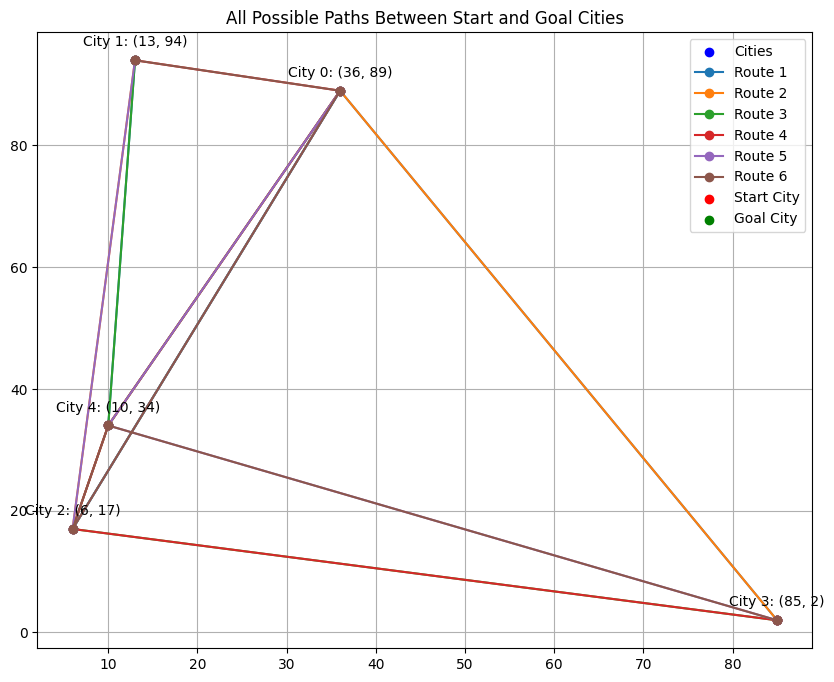

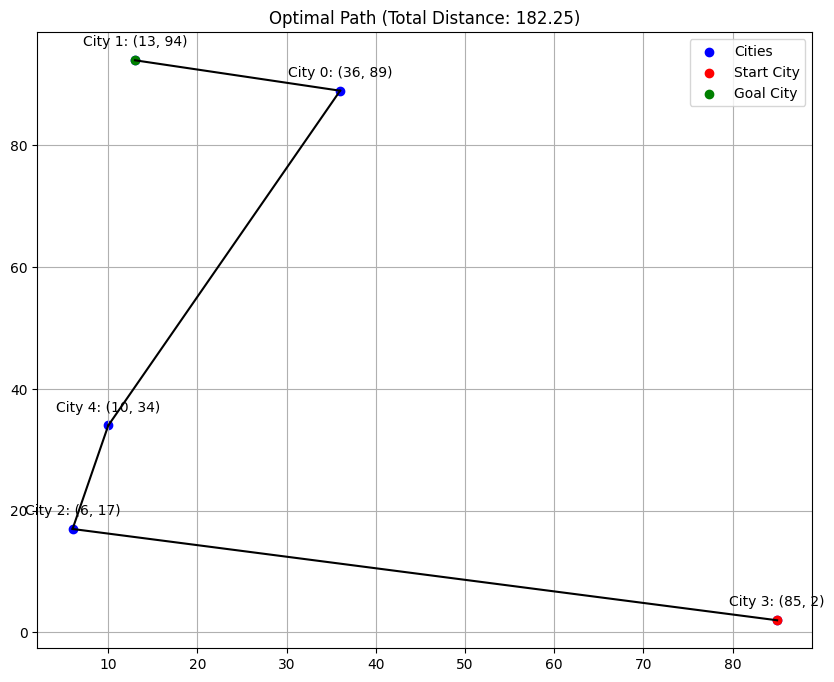

In [ ]:
import itertools
import math
import matplotlib.pyplot as plt

# Function to calculate the Euclidean distance between two points
def calculate_distance(city1, city2):
    return math.dist(city1, city2)

# Function to calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = calculate_distance(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Generate all possible routes from start to end city
def generate_possible_routes(start, end, num_cities):
    all_cities = set(range(num_cities))
    all_cities.discard(start)
    all_cities.discard(end)
    possible_routes = []
    for permutation in itertools.permutations(all_cities):
        route = [start] + list(permutation) + [end]
        possible_routes.append(route)
    return possible_routes

# Calculate the costs of all possible routes
def calculate_possible_route_costs(cities, possible_routes):
    route_costs = []
    for route in possible_routes:
        cost = calculate_total_distance(route, cities)
        route_costs.append(cost)
    return route_costs

# Plot all possible paths between start and end city
def plot_all_possible_paths(cities, possible_routes, start_city, goal_city):
    x, y = zip(*cities)
    plt.figure(figsize=(10, 8))

    # Plot city coordinates
    for i, (x_coord, y_coord) in enumerate(cities):
        plt.annotate(f'City {i}: ({x_coord}, {y_coord})', (x_coord, y_coord),
                     textcoords="offset points", xytext=(0, 10), ha='center')

    # Plot the cities in blue
    plt.scatter(x, y, marker='o', color='b', label='Cities')

    # Plot all possible routes with different colors
    for i, route in enumerate(possible_routes):
        plt.plot([cities[route[j]][0] for j in range(len(route))],
                 [cities[route[j]][1] for j in range(len(route))], 'o-', label=f'Route {i + 1}')

    # Mark start city as red
    plt.scatter(cities[start_city][0], cities[start_city][1], marker='o', color='r', label='Start City')

    # Mark goal city as green
    plt.scatter(cities[goal_city][0], cities[goal_city][1], marker='o', color='g', label='Goal City')

    plt.title('All Possible Paths Between Start and Goal Cities')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

# Plot the cities and the optimal path in a separate graph
def plot_cities_and_optimal_path(cities, optimal_path, start_city, goal_city):
    x, y = zip(*cities)
    plt.figure(figsize=(10, 8))

    # Plot city coordinates
    for i, (x_coord, y_coord) in enumerate(cities):
        plt.annotate(f'City {i}: ({x_coord}, {y_coord})', (x_coord, y_coord),
                     textcoords="offset points", xytext=(0, 10), ha='center')

    # Plot the cities in blue
    plt.scatter(x, y, marker='o', color='b', label='Cities')

    # Plot the optimal path in black
    for i in range(len(optimal_path) - 1):
        plt.plot([cities[optimal_path[i]][0], cities[optimal_path[i + 1]][0]],
                 [cities[optimal_path[i]][1], cities[optimal_path[i + 1]][1]], 'k-')

    # Mark start city as red
    plt.scatter(cities[start_city][0], cities[start_city][1], marker='o', color='r', label='Start City')

    # Mark goal city as green
    plt.scatter(cities[goal_city][0], cities[goal_city][1], marker='o', color='g', label='Goal City')

    plt.title(f'Optimal Path (Total Distance: {calculate_total_distance(optimal_path, cities):.2f})')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

if __name__ == "__main__":
    # Define the coordinates of cities
    city_coordinates = [(36, 89), (13, 94), (6, 17), (85, 2), (10, 34)]

    # Get the number of cities
    num_cities = len(city_coordinates)

    # Prompt the user to enter the start and goal cities
    start_city = int(input(f"Enter the number of the start city (0 to {num_cities - 1}): "))
    goal_city = int(input(f"Enter the number of the goal city (0 to {num_cities - 1}): "))

    # Generate all possible routes from start to goal city
    possible_routes = generate_possible_routes(start_city, goal_city, num_cities)
    route_costs = calculate_possible_route_costs(city_coordinates, possible_routes)

    # Find the optimal path (the one with the minimum cost)
    min_cost_index = route_costs.index(min(route_costs))
    optimal_path = possible_routes[min_cost_index]

    # Print all possible routes and their costs
    for i, route in enumerate(possible_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    # Print the optimal path and its total distance
    print("\nOptimal Path:")
    print(optimal_path)
    print(f"Total Distance: {calculate_total_distance(optimal_path, city_coordinates):.2f}")

    # Plot all possible paths between start and goal city
    plot_all_possible_paths(city_coordinates, possible_routes, start_city, goal_city)

    # Plot the cities and the optimal path in a separate graph
    plot_cities_and_optimal_path(city_coordinates, optimal_path, start_city, goal_city)
